# LP IV - Assignment 2

Name    : Isha Kanade <br>
Roll no : 43135 <br>
Batch   : Q - 9

### Problem statement : 
Implementing Feedforward neural networks with Keras and TensorFlow

    a. Import the necessary packages
    b. Load the training and testing data (MNIST/CIFAR10)
    c. Define the network architecture using Keras
    d. Train the model using SGD
    e. Evaluate the network
    f. Plot the training loss and accuracy

In [1]:
# Importing the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
# Load the training and testing MNIST data
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [5]:
for i in range(10):
  print(y_train[i])

[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0 0]


In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], 3072)
x_test = x_test.reshape(x_test.shape[0], 3072)
print(x_train.shape)

(50000, 3072)


In [8]:
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout

In [9]:
#Define the network architecture using Keras
model = Sequential()
model.add(Dense(units=1024, input_shape=(3072,), activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

In [10]:
# Training the model using SGD
sgd = SGD(learning_rate=0.1, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x=x_train, y=y_train,validation_data=(x_test, y_test), batch_size= 512, epochs= 10)

Epoch 1/10
98/98 [==============================] - 8s 73ms/step - loss: 2.1059 - accuracy: 0.2470 - val_loss: 2.0620 - val_accuracy: 0.2606
Epoch 2/10
98/98 [==============================] - 6s 65ms/step - loss: 1.8740 - accuracy: 0.3298 - val_loss: 1.8584 - val_accuracy: 0.3253
Epoch 3/10
98/98 [==============================] - 6s 64ms/step - loss: 1.7911 - accuracy: 0.3631 - val_loss: 1.7634 - val_accuracy: 0.3611
Epoch 4/10
98/98 [==============================] - 7s 70ms/step - loss: 1.7350 - accuracy: 0.3843 - val_loss: 1.7735 - val_accuracy: 0.3689
Epoch 5/10
98/98 [==============================] - 7s 74ms/step - loss: 1.6973 - accuracy: 0.3970 - val_loss: 1.6207 - val_accuracy: 0.4274
Epoch 6/10
98/98 [==============================] - 7s 70ms/step - loss: 1.6491 - accuracy: 0.4192 - val_loss: 1.6567 - val_accuracy: 0.4206
Epoch 7/10
98/98 [==============================] - 7s 68ms/step - loss: 1.6239 - accuracy: 0.4271 - val_loss: 1.6381 - val_accuracy: 0.4317
Epoch 8/10
98

In [12]:
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54      1000
           1       0.57      0.59      0.58      1000
           2       0.45      0.19      0.27      1000
           3       0.34      0.37      0.35      1000
           4       0.54      0.23      0.32      1000
           5       0.53      0.22      0.31      1000
           6       0.52      0.50      0.51      1000
           7       0.29      0.79      0.43      1000
           8       0.71      0.38      0.50      1000
           9       0.43      0.64      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.49      0.44      0.43     10000
weighted avg       0.49      0.44      0.43     10000



In [13]:
# Evaluating the model

test_loss, test_acc = model.evaluate(x_test, y_test)

print("\nTest Loss: {} \n\nTest Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 8ms/step - loss: 1.5782 - accuracy: 0.4423

Test Loss: 1.5781702995300293 

Test Accuracy: 0.4422999918460846


In [14]:
# Plot the training loss and accuracy

In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


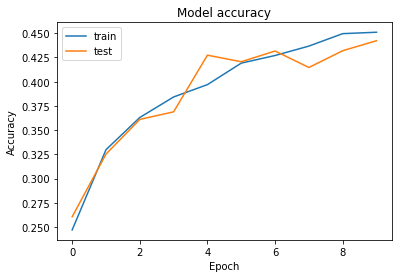

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


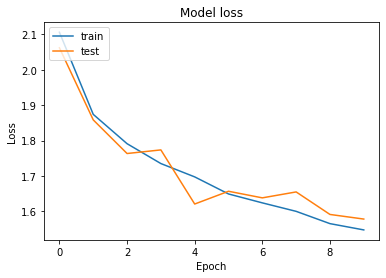

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()